# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 186 (delta 85), reused 150 (delta 49), pack-reused 0
Receiving objects: 100% (186/186), 34.12 MiB | 13.13 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

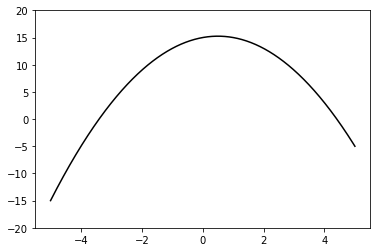

In [3]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [5]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

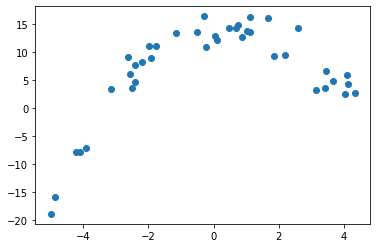

In [6]:
plt.scatter(X, Y)

#draw_polynomial(coefs)

## Training a polynomial regression model

In [7]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [14]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly = PolynomialFeatures(200,include_bias = False)
    X = poly.fit_transform(X.reshape(-1,1))

    return X
X_poly=addPoly(X,200)

In [15]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

## Splitting data into training and testing

In [18]:
from sklearn.model_selection import train_test_split

## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly,Y,test_size=0.2)

In [19]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [27]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)

model_no_reg = LinearRegression(normalize = True)
model_no_reg.fit(X_train,  y_train)




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

Training error (rmse): 0.5671686823487019
Testing error (rmse): 2456686764.5019913


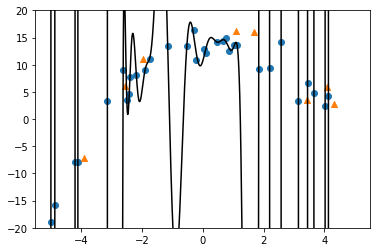

Polynomial coefficients
[10.646925345561815, 18.40666993225727, 73.13211089184747, -342.6341147203324, -253.20517076206917, 1712.7901647817405, -1.8406200446988832, -3338.5799972586806, 490.60580221196875, 3405.464867702103, -468.44343560337256, -2036.4898458463356, 169.52221675280043, 740.4249671860393, -21.415751862571323, -164.48383449633394, -1.7242482801243981, 21.731984588335816, 0.6924486320143044, -1.5456322005484546, -0.05151623548860932, 0.03791420025477354, -0.00036290170139795876, 0.0013252268043796834, 0.00010928178354506695, -3.8454767994742645e-05, 2.7464350593417324e-06, -2.414459077597142e-06, -8.838536792496898e-08, -3.002202673713782e-08, -7.774775910441868e-09, 1.8185947987081632e-09, -2.3771944123276223e-10, 1.2458326386134286e-10, -1.7425777518062793e-12, 4.227099956479441e-12, 2.2550428995127558e-13, 8.16830312674566e-14, 1.5262208325123178e-14, -5.730534793644525e-16, 6.3303101338606e-16, -1.4460895127069043e-16, 1.9959638364945392e-17, -8.670388949723277e-18, 4

In [28]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [32]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)

model_L1_reg = linear_model.Lasso(alpha=0.1,normalize = True)
model_L1_reg.fit(X_train,  y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Lasso(alpha=0.1, normalize=True)

Training error (rmse): 1.9316787411309393
Testing error (rmse): 2.8805337208066106


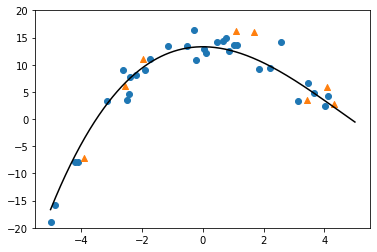

Polynomial coefficients
[13.30321361730401, 0.0, -0.8613138368567548, 0.061452345248984554, -0.0005835006640770497, 0.00011886814060014096, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0

In [33]:
display_results(model_L1_reg)  #remain of weights = 0

## Training a polynomial regression model with L2 regularization

In [35]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)

model_L2_reg = linear_model.Ridge(alpha=1.0 ,normalize = True)
model_L2_reg.fit(X_train,  y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(normalize=True)

Training error (rmse): 3.121909344686299
Testing error (rmse): 4.4275436349042065


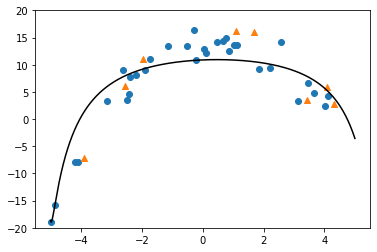

Polynomial coefficients
[10.881532845320677, 0.23828595844762507, -0.25406095715459825, 0.011266628844204256, -0.007889717420256136, 0.0004448858886915869, -0.00023401638258781427, 1.5896560203072958e-05, -6.733014209562244e-06, 5.261601022892162e-07, -1.9036148731946865e-07, 1.6509692569537927e-08, -5.339671516321193e-09, 5.001608774971907e-10, -1.4926346123810284e-10, 1.4796835991814837e-11, -4.162324981793207e-12, 4.3000189170188184e-13, -1.1567984296365116e-13, 1.2299879343841192e-14, -3.1972298735306437e-15, 3.4599271978068994e-16, -8.75831159165003e-17, 9.534388590976782e-18, -2.3658749743985514e-18, 2.5534381076861146e-19, -6.251548656184337e-20, 6.544807699541032e-21, -1.5935297228657594e-21, 1.554700408467074e-22, -3.8133447229605556e-23, 3.150011046415381e-24, -8.029935928593625e-25, 3.77592273707119e-26, -1.1769044978278313e-26, -1.017320617332883e-27, 1.015853959761954e-28, -1.1280274664548792e-28, 2.0122093077026712e-29, -6.559586297460087e-30, 1.253997427568813e-30, -3.20

In [36]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [37]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-2.560891,6.043190,2.200442e+01,6.584311,7.931675
1,1.681532,16.070558,-4.092290e+02,11.156921,10.555227
2,-3.909422,-7.163796,2.386585e+08,-3.777365,1.231584
3,-1.966873,11.133218,6.404541e+00,9.491321,9.195780
4,4.097463,5.933186,2.066636e+07,3.042757,5.195887
5,3.424602,3.526993,-8.227201e+04,5.645679,7.868329
6,1.108870,16.141450,1.403262e+01,12.327254,10.837132
7,4.328338,2.748648,-6.944429e+09,2.125830,3.786534
